<a href="https://colab.research.google.com/github/PhuongTa/ml-course/blob/main/dog_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# unzip file
#!unzip "/content/drive/MyDrive/ml-course/dog_vision/data/train.zip" -d "/content/drive/MyDrive/ml-course/dog_vision/data/train"
#!unzip "/content/drive/MyDrive/ml-course/dog_vision/data/test.zip" -d "/content/drive/MyDrive/ml-course/dog_vision/data/test"


# 🐩 End to end Multi-class Dof breed Classification

This notebook builds an end-to-end multi-class image classifier using Tensorflow 2.0 and Tensorflow Hub.

## 1. Problem

Identifying the breed of a dog given an image of a dog.

When I'm sitting at the cafe and I take a photo of a dog, I want to know what breed of dog it is.

## 2. Data

The data we're using is from Kaggle's dog breed identification competition.

https://www.kaggle.com/c/dog-breed-identification/data?select=test

## 3. Evaluation

The evaluation is a file prediction probabilities for each dog breed of each test image.

https://www.kaggle.com/competitions/dog-breed-identification/overview/evaluation

## 4. Features

Some information about the data:
* We're dealing with images (unstructured data) so it's probably best we use deep learning/transfer learning.
* There are 120 breeds of dogs (this mean there are 120 different classes.)
* There around 10,000+ images in the training set. (These images have labels.)
* There around 10,000+ images in the test set. (These images don't have labels, because we'll want to predict them).


## Get our workspace ready

* Import TensorFlow 2.x ✅
* Import TensorFlow Hub ✅
* Make sure we're using a GPU ✅
* 

In [1]:
# Import neccessary tools
import tensorflow as tf
import tensorflow_hub as hub

print("TF version:", tf.__version__)
print("TF Hub version:", hub.__version__)

# Check for GPU availability
print("GPU", "is using" if tf.config.list_physical_devices("GPU")
                                  else "not available")

TF version: 2.11.0
TF Hub version: 0.12.0
GPU is using


# Getting our data ready (turning into Tensor)

With all machine learning models, our data has to be in numerical format. So that's what we'll be doing first. Turning our images into Tensors (numerical representations).

Let's start by accessing our data and checking out the labels.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# Check out the labels of our data
labels_csv = pd.read_csv("drive/MyDrive/ml-course/dog_vision/data/labels.csv")
print(labels_csv.describe())
labels_csv.head()

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126


,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


<AxesSubplot:>

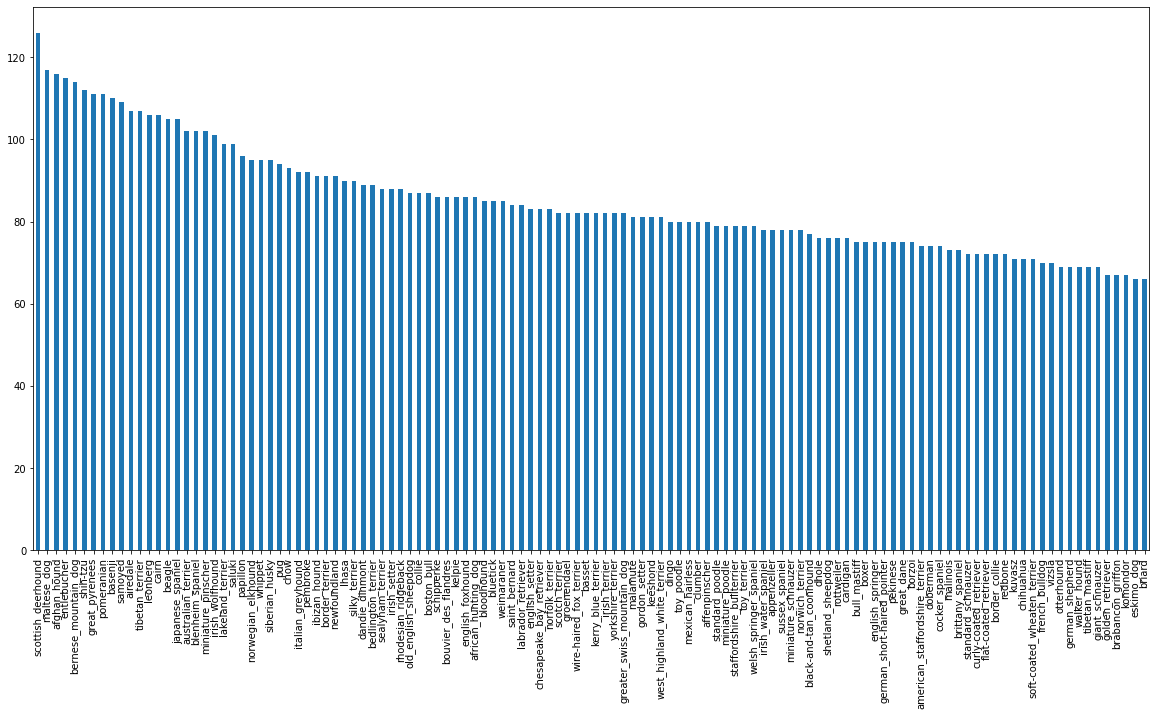

In [8]:
# How many images are there of each breed?
labels_csv["breed"].value_counts().plot.bar(figsize=(20,10))

In [9]:
labels_csv.breed.value_counts().median()

82.0